## Cipla DataScientist Hiring Challange
In this challange, I am provided with a set of csv files containing data of loan applicants and my job is to come up with suitable <b>predictive model</b> that can predict the <u><i><b>sanctioned amount of loan</b></i></u> that should be granted to applicant.<br><br>
By first look of the problem it is clear that we need to be cautious about the <b>false positives</b> as it will be more of a <u>monitary punishment</u> when compared to <b>true negatives</b>. In this sense false positive is the set of applicants who have high chance of cheating or have a prior record of the same while true negative are profit providers as they are commited customers who have high chance of paying out installments or have no cheating history. The problem that I am anticipating at this instance is the proper policy to deal with applicants who have not applied for loans prior to this and thus classifying them to be either cheater or commited customer will be crucial for not just this problem statement but for real time streaming data of same nature.<br><br>Moreover the problem itself belongs in the domain of regression but above domain knowledge can be helpful in working out and hence optimizing the solution. 
With this I mark end of my <b>initial brainstorming</b>. 

In [1]:
from pandas import read_csv                          # reading in our dataset. 
from pandas import DataFrame                         # creating a dataframe from the dictionary object.
from numpy import array                              # for converting lists to numpy arrays.
from matplotlib import pyplot as plt                 # for visualisation of the dataset.
import os                                            # for os name detection
from sklearn.metrics import r2_score                 # metric for performance evaluation of the models.
from sklearn.model_selection import train_test_split # for splitting the dataset into training and validation sets.
from sklearn.preprocessing import StandardScaler, MinMaxScaler   # For Normalization.
# -------------- imports for ML algorithms ----------------
from sklearn.linear_model import LinearRegression    
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPool1D, Flatten
#-----------------------------------------------------------
import Hyperparameter_Tuning                         # Custom python script for hyperparameter tuning.
from warnings import filterwarnings                  # removing unwanted clusterring of warnings.
filterwarnings("ignore")

In [2]:
# initialize the environment
if(not os.path.exists('predictions')):
    # make predictions directory where all prediction files in csv format will be stored.
    !mkdir predictions 
if(not os.path.exists('plots')):
    # makes plots directory which will hold all the visualization files.
    !mkdir plots
if os.name=='nt':
    # for Windows system
    # removes all the files in plots and predictions directory recursively.
    !rmdir /S /Q plots
    !mkdir plots
    !rmdir /S /Q predictions
    !mkdir predictions
else:
    # for Linux system
    # removes all the files in plots and predictions directory recursively.
    !rm -rf plots/*             
    !rm -rf predictions/*

In [3]:
train_dataset=read_csv('dataset/train.csv')       # Reads the training data file in pandas dataframe format.
test_dataset=read_csv('dataset/test.csv')         # Reads the test data file in pandas dataframe format. 

In [4]:
train_dataset.head()     # prints the top 5 rows of the training data.

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [5]:
train_dataset.tail()          # prints the last 5 rows of training data.

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,...,869.61,0,Unpossessed,566,4969.41,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,...,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,NaN,Low,Working,Sales staff,Urban,81410.08,...,NaN,0,Active,959,NaN,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,...,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87
29999,C-33003,Bridget Garibaldi,F,63,3068.24,High,Pensioner,NaN,Rural,156290.54,...,815.44,0,Active,344,3068.24,3,Rural,1,194512.60,117217.90


By looking at the head (top 5 rows) and tail (bottom 5 rows) of the dataset it is clear that we have alot of features some of which might not be much of relevance but we need to follow paradigm of feature engineering to deduce which set of features best suits the predictive modelling. Apart from that we have to address some categorical type features to be mapped to numerical form and check for count of NANs and then decide over NAN elimination strategy. This extent of noise reduction and hence preprocessing will be sufficient as far as I can contemplate at this point of time. 

In [6]:
def metadata(dataset,mode):
    # Helper to fetch the metadata of the dataframe which is provided as argument.
    # mode is argument for getting specific metadata printed about the supplied dataframe.
    # 'dataset' : pandas dataframe with column headers set.
    # 'mode' : Integer belonging to the discrete set of [0,1].
    # if mode=0, fetch the columnwise datatype of the datapoints.
    # if mode=1, fetch the columnwise NAN count.
    assert mode==1 or mode==0 , "Mode Should be in the interval [0,1]"
    if mode==0:
        # mode to check the datatypes of each individual columns.
        print("Column Name",end="")
        for i in range(35-len("Column Name")):
            print(end=" ")
        print(" Data Type")
        print("-------------------------------------------------------------")
        for col in dataset.columns:
            print(col,end="")
            for i in range(30-len(col)):
                print(end=" ")
            print("|   ",dataset[str(col)].dtype)
    else:
        # mode to check the NAN count of each columns. 
        max_NAN=0        # stores the count of Maximum number of NAN that is present in the dataset.
        colname=""       # stores the columns which is our culprit that contains maximum NAN count
        print("Column Name",end="")
        for i in range(35-len("Column Name")):
            print(end=" ")
        print(" NAN Count")
        print("-------------------------------------------------------------")
        for col in dataset.columns:
            cnt=dataset[str(col)].isnull().sum()
            print(col,end="")
            for i in range(30-len(col)):
                print(end=" ")
            print("|   ",cnt)
            if cnt>max_NAN:
                max_NAN=cnt
                colname=col
        if max_NAN!=0:
            print()
            print(f"Maximum NAN count found is {max_NAN} in column \"{colname}\"! Which is {round(max_NAN/len(dataset),4)*100}% of the total dataset.")

In [7]:
# Let's check the datatype of data of each columns first.
metadata(train_dataset,0)

Column Name                         Data Type
-------------------------------------------------------------
Customer ID                   |    object
Name                          |    object
Gender                        |    object
Age                           |    int64
Income (USD)                  |    float64
Income Stability              |    object
Profession                    |    object
Type of Employment            |    object
Location                      |    object
Loan Amount Request (USD)     |    float64
Current Loan Expenses (USD)   |    float64
Expense Type 1                |    object
Expense Type 2                |    object
Dependents                    |    float64
Credit Score                  |    float64
No. of Defaults               |    int64
Has Active Credit Card        |    object
Property ID                   |    int64
Property Age                  |    float64
Property Type                 |    int64
Property Location             |    object
Co-Appli

In [8]:
# Now lets check the NAN counts of each columns.
metadata(train_dataset,1)

Column Name                         NAN Count
-------------------------------------------------------------
Customer ID                   |    0
Name                          |    0
Gender                        |    53
Age                           |    0
Income (USD)                  |    4576
Income Stability              |    1683
Profession                    |    0
Type of Employment            |    7270
Location                      |    0
Loan Amount Request (USD)     |    0
Current Loan Expenses (USD)   |    172
Expense Type 1                |    0
Expense Type 2                |    0
Dependents                    |    2493
Credit Score                  |    1703
No. of Defaults               |    0
Has Active Credit Card        |    1566
Property ID                   |    0
Property Age                  |    4850
Property Type                 |    0
Property Location             |    356
Co-Applicant                  |    0
Property Price                |    0
Loan Sanction A

In [9]:
# Let's chek same metadata information about test dataset
metadata(test_dataset,0)
print()
metadata(test_dataset,1)

Column Name                         Data Type
-------------------------------------------------------------
Customer ID                   |    object
Name                          |    object
Gender                        |    object
Age                           |    int64
Income (USD)                  |    float64
Income Stability              |    object
Profession                    |    object
Type of Employment            |    object
Location                      |    object
Loan Amount Request (USD)     |    float64
Current Loan Expenses (USD)   |    float64
Expense Type 1                |    object
Expense Type 2                |    object
Dependents                    |    float64
Credit Score                  |    float64
No. of Defaults               |    int64
Has Active Credit Card        |    object
Property ID                   |    int64
Property Age                  |    float64
Property Type                 |    int64
Property Location             |    object
Co-Appli

By this metadata it is conclusive that I cannot simply drop the NAN rows as it forms one healthy quarter of the dataset in both training and testing sets. Apart from this the NANs are present in columns whose type is object and by loical deduction it is clear that many of them are categorical in nature so I will first transform those columns into numerical counterpart and then proceed with further analysis.    

In [10]:
def voteCount(x):
    # helper fumction to get the key which have maximum value.
    # 'x' is a dictionary with key as string and have a integral value.
    max=0
    val=''
    for i in x.keys():
        if x[i]>=max:
            max=x[i]
            val=i
    return val

In [11]:
def removeNoise(dataset):
    # helper function to denoise the dataframe and preprocess the columns so that it will be sufficient for 
    # furthur model building.
    for col in dataset.columns:
        if dataset[str(col)].dtype=='object':
            # this case essentially takes care of string type columns.
            if str(col)!='Customer ID' and str(col)!='Name': 
                # this condition allows for preprocessing of only those columns which have significance in the predictive 
                # modelling. As ID and Name are not valuable features in any kind of statistical model and thus will not form
                # part of our predictor set. I am saving CPU cycles by eliminating preprocessing these columns.
                distinct={}         # dictionary to hold distinct row values as key and it's count as value.  
                replacement={}      # dictionary to hold mapping of string categorial to numerical categorical representation
                cnt=1             
                data=dataset[str(col)].values
                for i in data:
                    if(i not in distinct.keys()):                    
                        if type(i)==type(''):
                            distinct[i]=1       # sets the iniial count of the row value as 1 when it is not NAN.
                    else:
                        distinct[i]+=1          # increments the already present ount entry of the row value 
                #nan_replacement=voteCount(distinct)   # collects the mode value of column's row values to replace NAN.
                for i in distinct.keys():
                    replacement[i]=int(cnt)
                    cnt+=1
                dataset[str(col)].replace(replacement,inplace=True)
                nan_replacement=dataset[str(col)].mode()[0]
                dataset[str(col)].fillna(nan_replacement,inplace=True)
        elif dataset[str(col)].dtype=='int64':
            nan_replacement=dataset[str(col)].mode()[0]
            dataset[str(col)].fillna(nan_replacement,inplace=True)
        else:
            nan_replacement=dataset[str(col)].mean()
            dataset[str(col)].fillna(nan_replacement,inplace=True)
    return dataset
        

In [12]:
# Denoised dataframes are created.
train_dataset_denoised=removeNoise(train_dataset)
test_dataset_denoised=removeNoise(test_dataset)

In [13]:
# Let's chek same metadata information about dataset after the denoising operation.
metadata(train_dataset_denoised,0)
print()
metadata(train_dataset_denoised,1)
print()
metadata(test_dataset_denoised,0)
print()
metadata(test_dataset_denoised,1)

Column Name                         Data Type
-------------------------------------------------------------
Customer ID                   |    object
Name                          |    object
Gender                        |    float64
Age                           |    int64
Income (USD)                  |    float64
Income Stability              |    float64
Profession                    |    int64
Type of Employment            |    float64
Location                      |    int64
Loan Amount Request (USD)     |    float64
Current Loan Expenses (USD)   |    float64
Expense Type 1                |    int64
Expense Type 2                |    int64
Dependents                    |    float64
Credit Score                  |    float64
No. of Defaults               |    int64
Has Active Credit Card        |    float64
Property ID                   |    int64
Property Age                  |    float64
Property Type                 |    int64
Property Location             |    float64
Co-Appl

After passing our dataset through denoising operation we have all NANs removed from the dataset without affecting size of our dataset and also have retrieved numerical counterpart of columns which seems important for our predictive model. 

In [14]:
# Lets look at the statistical distribution of each column.
def statistical_information(dataset):
    # Helper function to calculate total row count, Mean , Minimum and Maximum values of each columns data.
    print("Column Name",end="")
    for i in range(35-len("Column Name")):
        print(end=" ")
    print(" Count",end="")
    for i in range(15-len("Count")):
        print(end=" ")
    print(" Mean",end="")
    for i in range(15-len("Mean")):
        print(end=" ")
    print(" Minimum",end="")
    for i in range(15-len("Minumum")):
        print(end=" ")
    print(" Maximum")
    print("-----------------------------------------------------------------------------------------------")
    for col in dataset.columns:
        if str(col)!='Customer ID' and str(col)!='Name':
            print(col,end="")
            for i in range(30-len(col)):
                print(end=" ")
            print("|   ",dataset[str(col)].count(),end="")
            for i in range(10-len(str(dataset[str(col)].count()))):
                print(end=" ")
            print("|   ",round(dataset[str(col)].mean(),3),end="")
            for i in range(10-len(str(round(dataset[str(col)].mean(),3)))):
                print(end=" ")
            print("|   ",dataset[str(col)].min(),end="")
            for i in range(10-len(str(dataset[str(col)].min()))):
                print(end=" ")
            print("|   ",dataset[str(col)].max())


In [15]:
statistical_information(train_dataset_denoised) 
print()
statistical_information(test_dataset_denoised) 

Column Name                         Count           Mean            Minimum         Maximum
-----------------------------------------------------------------------------------------------
Gender                        |    30000     |    1.504     |    1.0       |    2.0
Age                           |    30000     |    40.092    |    18        |    65
Income (USD)                  |    30000     |    2630.574  |    377.7     |    1777460.21
Income Stability              |    30000     |    1.086     |    1.0       |    2.0
Profession                    |    30000     |    2.046     |    1         |    8
Type of Employment            |    30000     |    5.325     |    1.0       |    18.0
Location                      |    30000     |    1.385     |    1         |    3
Loan Amount Request (USD)     |    30000     |    88826.334 |    6048.24   |    621497.82
Current Loan Expenses (USD)   |    30000     |    400.937   |    -999.0    |    3840.88
Expense Type 1                |    30000   

After going through above statistical data chart and prior Datatype charts of training and test datasets, found that column <b><u>Co-Applicant</u></b> is of type integr in training dataset and of string type in test set. Apart from this, There are some extereme values found for that column i.e. <b>-999 as minimum in training set</b> which is not something which is expected out of it as it is in contrary to what is being observed from <b>test set which only have 3 different values viz., 0. 1 and 2</b> in it.   

In [16]:
def plot(dataset,mode=0,name='Visualisation',val_range=(0,100),area=5,color='green',alpha=0.8):
    # Function to produce bulk plots of entire dataframe.
    # This is helpful in ditermining correlation between various columns of the dataset and helpful in
    # ditermination of plausible features that can be used as predictor set for the ML model.
    # Returns the list of filenames which are stored in plots directory.
    assert mode==0 or mode==1, "Only acceoptable values of mode are 0 and 1!"
    fnames=[]
    for col1 in dataset.columns:
        col2='Loan Sanction Amount (USD)'
        if(col1!=col2 and (type(dataset[str(col1)][0]) != type("")) and (type(dataset[str(col2)][0]) != type("")) ):
            if mode==0:
                # scatter plot
                plt.clf()
                plt.xlabel(f"{col1}")
                plt.ylabel(f"{col2}")
                plt.title(f"{col1} versus {col2} Scatter Plot")
                plt.scatter(dataset[str(col1)].values[val_range[0]:val_range[1]],dataset[str(col2)].values[val_range[0]:val_range[1]],s=area,c=color,alpha=alpha)
                plt.savefig(f"plots/{name}_{col1}_{col2}.png")
                plt.clf()
                fnames.append(f"plots/{name}_{col1}_{col2}.png")
            else:
                # line plot
                plt.clf()
                plt.xlabel(f"{col1}")
                plt.ylabel(f"{col2}")
                plt.title(f"{col1} versus {col2} Line Plot")
                plt.plot(dataset[str(col1)].values[val_range[0]:val_range[1]],dataset[str(col2)].values[val_range[0]:val_range[1]],s=area,c=color,alpha=alpha)
                plt.savefig(f"plots/{name}_{col1}_{col2}.png")
                plt.clf()
                fnames.append(f"plots/{name}_{col1}_{col2}.png")
    return fnames                        

In [17]:
fnames=plot(train_dataset_denoised,name="Train_Dataset")
print(f"{len(fnames)} training set plots generated and stored in ./plots")

21 training set plots generated and stored in ./plots


<Figure size 432x288 with 0 Axes>

<b>Scatter plots</b> are very good indicators of <b><u>correlation</u></b> and hence above plots can be prime mover for me in feature engineering.

Following are columns which I am considering as predictor features of our predictive model:
1. Gender
2. Age   
3. Income (USD)
4. Income Stability
5. Profession      
6. Type of Employment  
7. Location            
8. Loan Amount Request (USD)
9. Current Loan Expenses (USD)   
10. Expense Type 1                
11. Expense Type 2                
12. Dependents                    
13. Credit Score                  
14. No. of Defaults               
15. Has Active Credit Card                           
16. Property Age                  
17. Property Type                 
18. Property Location                               
19. Property Price

<b><u>Note </u>:</b> The decision of choice is based on the visual inspection of plots present in <b><i>./plots</i></b>. 

In [18]:
def vectorize(dataset,mode=0):
    # helper function to return the slice of dataset containing only selected features for predictor set in mode=0
    # and that of target when mode=1
    assert mode==0 or mode==1, "Only acceoptable values of mode are 0 and 1!"
    if mode==0:
        features=['Gender',
        'Age',
        'Income (USD)',
        'Income Stability',
        'Profession',
        'Type of Employment',
        'Location',
        'Loan Amount Request (USD)',
        'Current Loan Expenses (USD)',
        'Expense Type 1',
        'Expense Type 2',
        'Dependents',
        'Credit Score',
        'No. of Defaults',
        'Has Active Credit Card',
        'Property Age',
        'Property Type',
        'Property Location',
        'Property Price']
        return dataset[features]
    else:
        return dataset['Loan Sanction Amount (USD)']

In [19]:
# Feature generation for our ML models.
X=array(vectorize(train_dataset_denoised).values)
Y=array(vectorize(train_dataset_denoised,mode=1).values)

In [20]:
X_test=array(vectorize(test_dataset_denoised).values)    

In [21]:
# Normalization
#normalizer=MinMaxScaler()
normalizer=StandardScaler()
normalizer.fit(X)
X_normalized=normalizer.transform(X)
X_test_normalized=normalizer.transform(X_test)

In [22]:
def criterion(prediction,actual):
    # Evaluation criterion of ML models as suggested by Hackerearth challange portal.
    return max(0,100 * r2_score(actual,prediction))

In [23]:
def AI_enabler(model,model_alg,X,Y=[],split_ratio=0.1,shuffle=True,random_state=42,mode=0):
    # mode=1 for making predictions.
    # mode=0 for trainibng the model.
    # model_alg is string representing the name of the predictive model's algorithm. 
    # split_ratio is used to segment the input into training and validation set. Applicable only for mode=0. 
    assert mode==0 or mode==1, "Only two mnodes are allowed i.e. 0 and 1."
    if mode==0:
        X_train, X_val, Y_train, Y_val=train_test_split(X,Y,test_size=split_ratio,shuffle=shuffle,random_state=random_state)
        model.fit(X_train,Y_train)
        val_prediction=model.predict(X_val)
        metric=criterion(val_prediction,Y_val)
        print(f"After training {model_alg}, conceived metric = {metric}")
        return model
    else:
        prediction=model.predict(X)
        return prediction

In [24]:
def create_prediction_file(fname,test_df,prediction):
    # translates the dataframe into prediction file adhering to the submission format. 
    new_df=DataFrame({"Customer ID" : test_df["Customer ID"].values,"Loan Sanction Amount (USD)" : prediction})
    new_df.to_csv(f"predictions/{fname}.csv",index=False,header=True)

In [25]:
# Linear regression
model=LinearRegression(n_jobs=-1)
model_alg="Linear Regression"
model=AI_enabler(model,model_alg,X,Y)
prediction=AI_enabler(model,model_alg,X_test,mode=1)
create_prediction_file(model_alg,test_dataset_denoised,prediction)

After training Linear Regression, conceived metric = 58.35833717664922


In [26]:
# Ridge regression
model=Ridge(solver='auto',tol=1e-20)
model_alg="Ridge Regression"
model=AI_enabler(model,model_alg,X,Y)
prediction=AI_enabler(model,model_alg,X_test,mode=1)
create_prediction_file(model_alg,test_dataset_denoised,prediction)

After training Ridge Regression, conceived metric = 58.358379660661285


In [27]:
# ElasticNet regression
model=ElasticNet(tol=1e-10,max_iter=300000)
model_alg="ElasticNet Regression"
model=AI_enabler(model,model_alg,X,Y)
prediction=AI_enabler(model,model_alg,X_test,mode=1)
create_prediction_file(model_alg,test_dataset_denoised,prediction)

After training ElasticNet Regression, conceived metric = 58.41851486250425


In [28]:
# Gradient Boosting regression
model=GradientBoostingRegressor(tol=1e-10,max_depth=5,learning_rate=1e-4,n_estimators=300)
model_alg="Gradient Boosting Regression"
model=AI_enabler(model,model_alg,X,Y)
prediction=AI_enabler(model,model_alg,X_test,mode=1)
create_prediction_file(model_alg,test_dataset_denoised,prediction)

After training Gradient Boosting Regression, conceived metric = 3.7295731899146145


In [29]:
# Polynomial regression
model=LinearRegression(n_jobs=-1)
model_alg="Polynomial Regression"
polynomial_transform=PolynomialFeatures(degree=2)
X_poly=polynomial_transform.fit_transform(X,Y)
model=AI_enabler(model,model_alg,X_poly,Y)
X_test_poly=polynomial_transform.transform(X_test)
prediction=AI_enabler(model,model_alg,X_test_poly,mode=1)
create_prediction_file(model_alg,test_dataset_denoised,prediction)

After training Polynomial Regression, conceived metric = 61.531419665616696


In [30]:
# Multi Layered Perceptron Regressor
model=MLPRegressor(hidden_layer_sizes=[8],learning_rate_init=1e-4,shuffle=False,max_iter=1000)
model_alg="Multi Layered Perceptron Regression"
model=AI_enabler(model,model_alg,X,Y)
prediction=AI_enabler(model,model_alg,X_test,mode=1)
create_prediction_file(model_alg,test_dataset_denoised,prediction)

After training Multi Layered Perceptron Regression, conceived metric = 53.14102705161001


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 16)             928       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 16)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 32)             1568      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0

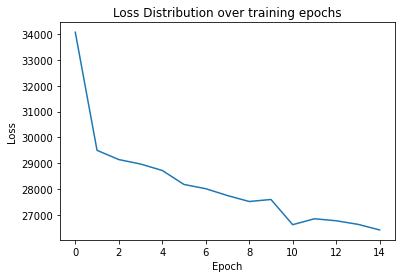

<Figure size 432x288 with 0 Axes>

In [31]:
# Tensorflow Model
epochs=15
model_alg="CNN Regressor"
X_morphed=X.reshape(-1,1,19)
Y_morphed=Y.reshape(-1,1)
model=Sequential()
model.add(Conv1D(16,3,input_shape=(1,19),activation='relu',padding='same'))
model.add(MaxPool1D(padding='same'))
model.add(Conv1D(32,3,activation='relu',padding='same'))
model.add(MaxPool1D(padding='same'))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=1e-4),loss='huber')
model.summary()
X_train, X_val, Y_train, Y_val=train_test_split(X_morphed,Y_morphed,test_size=0.1,shuffle=True,random_state=42)
history=model.fit(X_train,Y_train,batch_size=4,epochs=epochs,shuffle=True)
val_prediction=model.predict(X_val).reshape(-1)
metric=criterion(val_prediction,Y_val)
print(f"After training {model_alg}, conceived metric = {metric}")
X_test_morphed=X_test.reshape(-1,1,19)
prediction=model.predict(X_test_morphed).reshape(-1)
create_prediction_file(model_alg,test_dataset_denoised,prediction)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Distribution over training epochs')
dummy=[i for i in range(epochs)]
plt.plot(dummy,history.history['loss'])
plt.show()
plt.savefig(f"plots/{model_alg}.png")
plt.clf()

<b><u>Note</u> :</b>The maximum R^2 score acheived so far is <i>60.90680</i> (within the hackerearth evaluation system), I want to move ahead with <b>hyperparameter tuning</b> to search for optimal parameters in the parameter space. <br>
In the subsequent part of the code, I will use method of GridSearchCV of sklearn library to look for best set of parameters of the models which seems plausible in my preliminary analysis. For doing so, I have coded a custom hyperparameter tuning script which I am going to use.  

In [32]:
if not os.path.exists('HPT_performance.csv'):
    HPT=DataFrame(Hyperparameter_Tuning.hyperParameterOptimizer(X,Y))
    HPT.to_csv('HPT_performance.csv',header=True,index=False)
hyperparameters=read_csv('HPT_performance.csv')
print(hyperparameters)

         model  Best Score                                        Best Params
0          svm    0.311934  {'degree': 2, 'gamma': 'scale', 'kernel': 'pol...
1        ridge    0.574726   {'alpha': 0, 'max_iter': 1000, 'solver': 'auto'}
2  elastic_net    0.574726  {'alpha': 0, 'max_iter': 100000, 'selection': ...


In [33]:
# Support Vector Machine regression (HPT)
model=SVR(tol=1e-4,kernel='poly',degree=2,gamma='scale',max_iter=100000)
model_alg="Support Vector Machine Regression(HPT)"
model=AI_enabler(model,model_alg,X,Y)
prediction=AI_enabler(model,model_alg,X_test,mode=1)
create_prediction_file(model_alg,test_dataset_denoised,prediction)

After training Support Vector Machine Regression(HPT), conceived metric = 40.010582829363216


In [34]:
# Ridge regression (HPT)
model=Ridge(tol=1e-4,normalize=True,alpha=0,solver='auto',max_iter=1000)
model_alg="Ridge Regression(HPT)"
model=AI_enabler(model,model_alg,X,Y)
prediction=AI_enabler(model,model_alg,X_test,mode=1)
create_prediction_file(model_alg,test_dataset_denoised,prediction)

After training Ridge Regression(HPT), conceived metric = 58.35833717664944


In [35]:
# ElasticNet regression (HPT)
model=ElasticNet(tol=1e-4,normalize=True,alpha=0,max_iter=200000,selection='cyclic')
model_alg="ElasticNet Regression(HPT)"
model=AI_enabler(model,model_alg,X,Y)
prediction=AI_enabler(model,model_alg,X_test,mode=1)
create_prediction_file(model_alg,test_dataset_denoised,prediction)

After training ElasticNet Regression(HPT), conceived metric = 58.35833717664942


Tryout the models with normalized features.

In [36]:
# Linear regression (Normalized Features)
model=LinearRegression(n_jobs=-1)
model_alg="Linear Regression Normalized"
model=AI_enabler(model,model_alg,X_normalized,Y)
prediction=AI_enabler(model,model_alg,X_test_normalized,mode=1)
create_prediction_file(model_alg,test_dataset_denoised,prediction)

After training Linear Regression Normalized, conceived metric = 58.3583371766495


In [37]:
# Support Vector Machine regression (Normalized Features)
model=SVR(tol=1e-4,kernel='poly',degree=2,gamma='scale',max_iter=100000)
model_alg="Support Vector Machine Regression Normalized"
model=AI_enabler(model,model_alg,X_normalized,Y)
prediction=AI_enabler(model,model_alg,X_test_normalized,mode=1)
create_prediction_file(model_alg,test_dataset_denoised,prediction)

After training Support Vector Machine Regression Normalized, conceived metric = 0


In [38]:
# Ridge regression (Normalized Features)
model=Ridge(tol=1e-4,normalize=True,alpha=0,solver='auto',max_iter=1000)
model_alg="Ridge Regression Normalized"
model=AI_enabler(model,model_alg,X_normalized,Y)
prediction=AI_enabler(model,model_alg,X_test_normalized,mode=1)
create_prediction_file(model_alg,test_dataset_denoised,prediction)

After training Ridge Regression Normalized, conceived metric = 58.358337176649464


In [39]:
# ElasticNet regression (Normalized Features)
model=ElasticNet(tol=1e-4,normalize=True,alpha=0,max_iter=200000,selection='cyclic')
model_alg="ElasticNet Regression Normalized"
model=AI_enabler(model,model_alg,X_normalized,Y)
prediction=AI_enabler(model,model_alg,X_test_normalized,mode=1)
create_prediction_file(model_alg,test_dataset_denoised,prediction)

After training ElasticNet Regression Normalized, conceived metric = 58.358337176649385


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 1, 16)             928       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 16)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 32)             1568      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)               

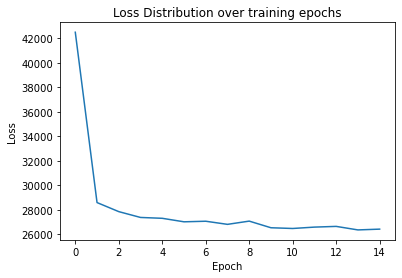

<Figure size 432x288 with 0 Axes>

In [40]:
# Tensorflow Model (Normalized Features)
epochs=15
model_alg="CNN Regressor Normalized"
X_morphed=X_normalized.reshape(-1,1,19)
Y_morphed=Y.reshape(-1,1)
model=Sequential()
model.add(Conv1D(16,3,input_shape=(1,19),activation='relu',padding='same'))
model.add(MaxPool1D(padding='same'))
model.add(Conv1D(32,3,activation='relu',padding='same'))
model.add(MaxPool1D(padding='same'))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=1e-4),loss='huber')
model.summary()
X_train, X_val, Y_train, Y_val=train_test_split(X_morphed,Y_morphed,test_size=0.1,shuffle=True,random_state=42)
history=model.fit(X_train,Y_train,batch_size=4,epochs=epochs,shuffle=True)
val_prediction=model.predict(X_val).reshape(-1)
metric=criterion(val_prediction,Y_val)
print(f"After training {model_alg}, conceived metric = {metric}")
X_test_morphed=X_test_normalized.reshape(-1,1,19)
prediction=model.predict(X_test_morphed).reshape(-1)
create_prediction_file(model_alg,test_dataset_denoised,prediction)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Distribution over training epochs')
dummy=[i for i in range(epochs)]
plt.plot(dummy,history.history['loss'])
plt.show()
plt.savefig(f"plots/{model_alg}.png")
plt.clf()

In [41]:
# Gradient Boosting regression (Normalized Features)
model=GradientBoostingRegressor(tol=1e-10,max_depth=5,learning_rate=1e-4,n_estimators=300)
model_alg="Gradient Boosting Regression Normalized"
model=AI_enabler(model,model_alg,X_normalized,Y)
prediction=AI_enabler(model,model_alg,X_test_normalized,mode=1)
create_prediction_file(model_alg,test_dataset_denoised,prediction)

After training Gradient Boosting Regression Normalized, conceived metric = 3.729573141947229
